<a href="https://colab.research.google.com/github/ArifAygun/ML_Calisma_Notebooklari/blob/main/AA_Graduate_Project_1Std.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Quality Prediction of Iron Ore Mining Flotation Process - Part:1**

## **1. Problem Definition**

**Gangue concentrate predict in the reverse cationic flotation:**


Mined ores are mostly mixtures of extractable minerals and nonvaluable material (gangue). Mineral processing (e.g. ore dressing, ore beneficiation) follows mining and prepares the ore for extraction of the valuable metal. A principal step in mineral processing is physical separation of the particles of valuable minerals from the gangue, to produce an enriched portion (concentrate) containing most of the valuable minerals, and a discard (tailing) containing predominantly the gangue.

A separation of minerals by exploiting difference of surface properties (hydrophobicity) is called flotation. **The reverse cationic flotation** is commonly used to separate iron from silica. By adjusting the 'chemistry' of the pulp by adding various chemical reagents, iron minerals remain in the water and create sediment with a high concentration of iron (valuable minerals). At the same time, silica particles (gangue) attach to air bubbles and float to the surface.

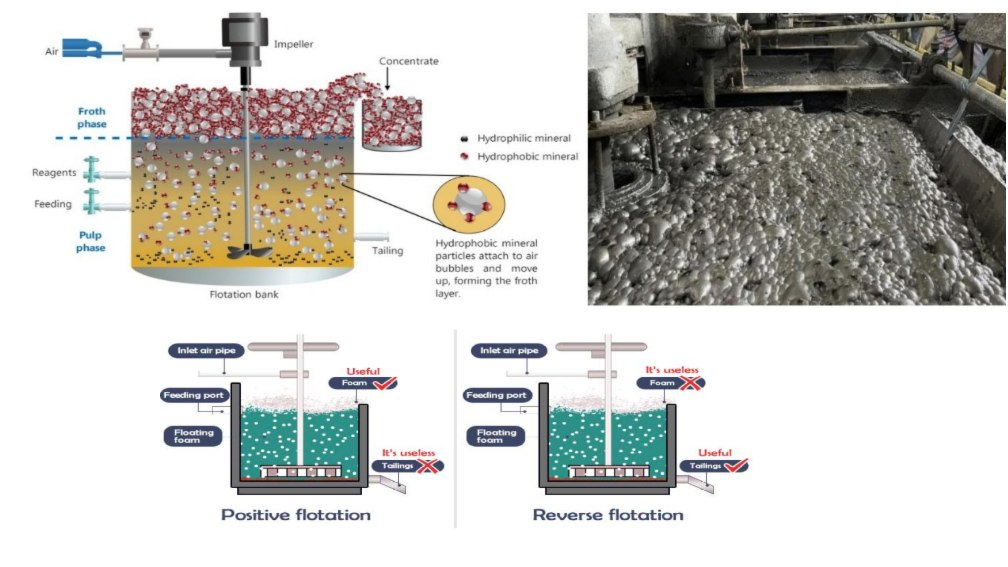

Flotation concentrate is periodically sampled to determine its purity (percentage of gangue). Higher purity in the concentrate is undesirable as it indicates that most valuable minerals had gone into the tailing. Purity measurement is usually done in a lab and can take some time before process engineers can make any adjustments based on the results. A timely investigation of concentrate purity is, therefore, a fundamental aspect for the control and optimization of the flotation process.

This project explores the application of machine learning to predict iron and gangue (silica) concentrate in the flotation output. The prediction will help process engineers assess the purity and take corrective actions in advance.

Source of dataset: https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process

##**2. Data Understanding**

###**2.1. Data Definitions**

- **Date**: Data collection time. (There is imbalance in measurement of variables)
- **% Iron Feed**: Feed grade of iron-containing ore.
- **% Silica Feed**: Feed grade of silica-containing ore.
- **Starch Flow**: Depressant chemical for Iron(Fe) containing ore measured in m³/h.
- **Amina Flow**: Collector chemical for Silica containing ore measured in m³/h.
- **Ore Pulp Flow**: The amount of pulp flow fed to the flotation columns as the product of the previous process step measured in t/h.
- **Ore Pulp pH**: pH is measured in pH scale.
- **Ore Pulp Density**: The solid percent of ore fed density ranges in kg/cm³
- **Flotation Column 01, 02, 03, 04, 05, 06, 07 Air Flow**: Air Flows that goes into the flotation cell measured in Nm³/h.
- **Flotation Column 01, 02, 03, 04, 05, 06, 07 Level**: Froth level in the flotation cell measured in mm.
- **% Iron Concentrate**: Concentrate grade of iron-containing ore in percentage.
- **% Silica Concentrate**: Concentrate grade of silica-containing ore in percentage

### **2.2. Inspection of the data**

- The first column shows time and date range (march 2017 -  september 2017). 
- Measurements are taken every 5-6 hours for the first 2 columns (input - raw material).
- Measurements are taken every 1 hour for the last 2 columns (output - processed material). 
- Some columns were sampled every 20 second. 
- The second and third columns are quality measures of the iron ore pulp right before it is fed into the flotation plant. 
- From Column 4 until column 8 are the most important variables that impact in the ore quality in the end of the process. 
- From column 9 until column 22, we can see process data (froth level and air flow inside the flotation columns, which also impact in ore quality). 
- The last two columns are the final iron ore pulp quality measurement from the lab. 

### **2.3. Aim of the Project**

- To predict the percentage of output (iron and silica) concentrate in the mineral processing (reverse cationic flotation) plant

##**3. Data Collection**

###**3.1. Import Libraries**

In [2]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn import metrics

from fastai.tabular import *

###**3.2. Import Dataset**

In [18]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Flotation/

flotation = pd.read_csv('Flotation_Plant.csv', parse_dates = True, index_col = 'date',decimal=',')
flotation.sample(5).T

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Flotation


date,2017-06-15 10:00:00,2017-07-27 04:00:00,2017-05-31 21:00:00,2017-04-19 22:00:00,2017-07-06 06:00:00
% Iron Feed,52.580000,57.46000,64.030000,56.950000,47.79000
% Silica Feed,18.630000,10.80000,6.260000,12.940000,27.08000
Starch Flow,3744.360000,3828.34000,2859.030000,2593.130000,4814.94000
Amina Flow,354.246000,529.82900,330.530000,545.654000,520.60800
Ore Pulp Flow,399.084000,398.75100,398.803000,403.434000,403.53900
Ore Pulp pH,9.143600,10.15710,9.612430,9.790200,10.49770
Ore Pulp Density,1.520256,1.65575,1.521108,1.745030,1.73327
Flotation Column 01 Air Flow,300.848000,250.37900,300.522000,250.185000,301.67000
Flotation Column 02 Air Flow,303.132000,297.30600,295.054000,256.535000,302.67700
Flotation Column 03 Air Flow,298.088000,297.80800,299.017000,250.827000,298.45500


**Check if we have missing (nan) values:**

In [22]:
shape1 = flotation.shape
flotation = flotation.dropna()
shape2 = flotation.shape
if shape1 == shape2:
    print('Data contains no nan values.')
else:
    print('Data contains nan values.')

Data contains no nan values.


In [35]:
flotation.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-29 12:00:00,60.18,9.34,2044.99,349.911,405.625,9.74604,1.649650,200.393,195.734,201.826,...,251.002,555.264467,552.255566,614.984714,428.430,413.662,447.887,464.869,66.44,1.36
2017-03-29 12:00:00,60.18,9.34,2020.55,353.064,404.402,9.74169,1.643469,200.131,196.476,200.909,...,250.828,557.839933,554.531131,659.557429,431.146,422.308,444.326,463.224,66.44,1.36
2017-03-29 12:00:00,60.18,9.34,2012.84,356.217,403.180,9.73733,1.637289,199.869,197.219,199.992,...,250.653,560.415400,556.806697,704.130143,433.863,430.954,440.765,461.579,66.44,1.36
2017-03-29 12:00:00,60.18,9.34,2007.67,359.371,401.957,9.73298,1.631108,199.607,197.961,199.075,...,250.478,562.990867,559.082262,748.702857,436.580,439.600,437.204,459.935,66.44,1.36
2017-03-29 12:00:00,60.18,9.34,2003.92,362.524,400.735,9.72862,1.624928,199.345,198.703,198.158,...,250.304,565.566333,561.357828,793.275571,439.296,448.246,433.643,458.290,66.44,1.36


The dataframe contains data about:

Quality measures of the iron ore pulp before feeding it into the process (inputs)
Features that can effect the quality of the product (process parameters)
Quality measures of the iron ore pulp as product of the process (outputs)

OK, this looks good so far. Lets start with visualizing the data to see flaws in the data. We start by plotting our most improtant variables '% Iron Concentrate' and '% Silica Concentrate':

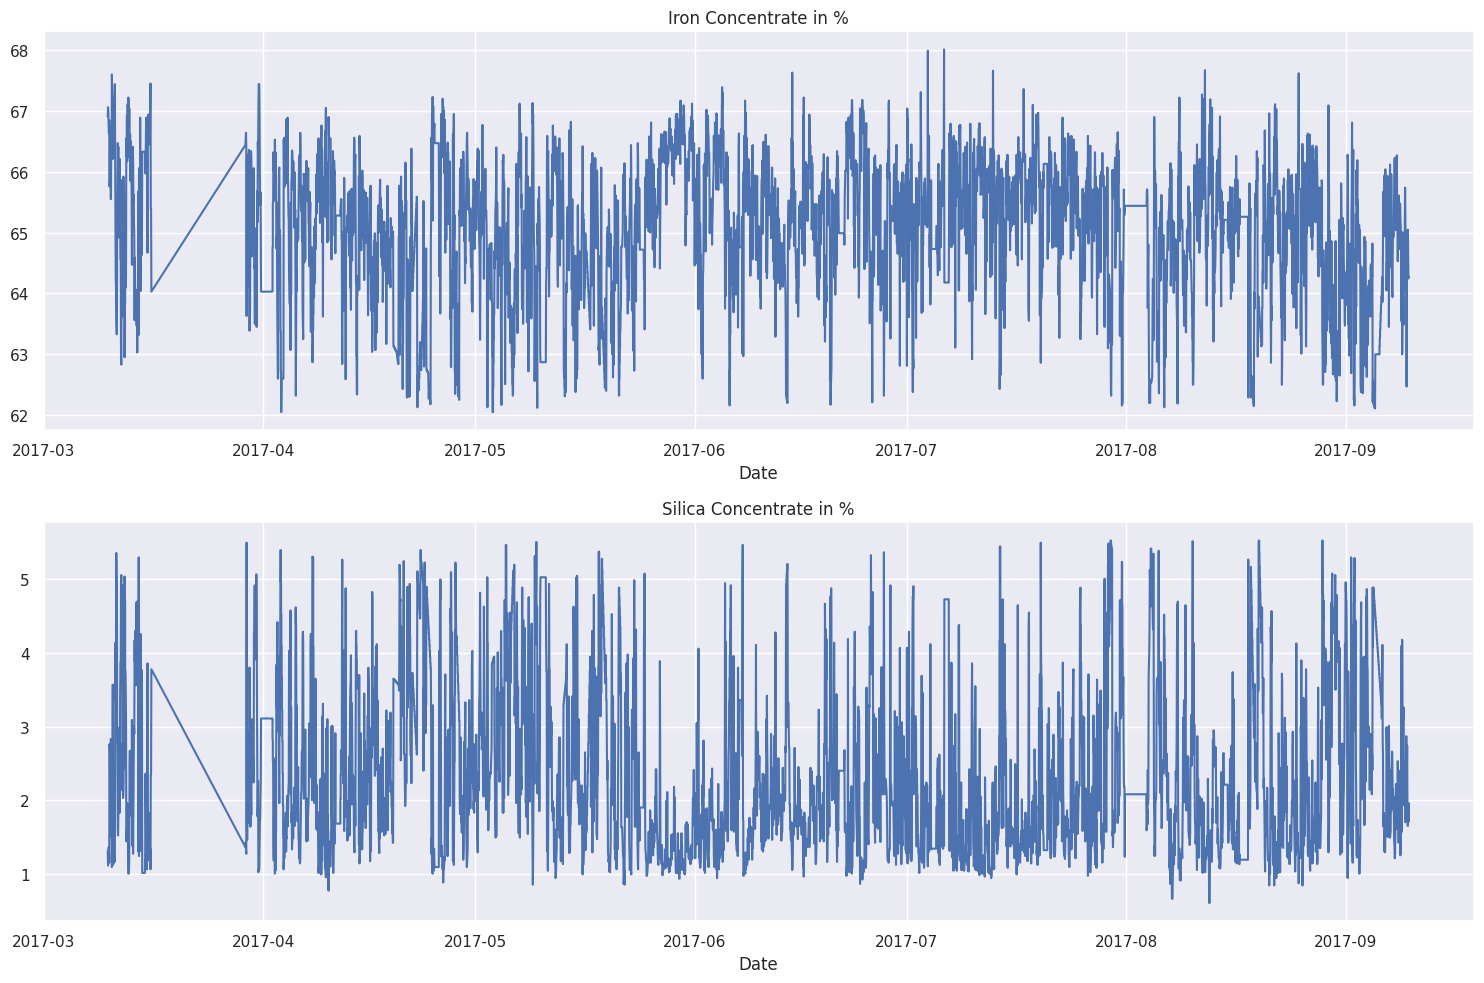

In [32]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(flotation['% Iron Concentrate'])
plt.xlabel('Date')
plt.title('Iron Concentrate in %')

plt.subplot(2, 1, 2)
plt.plot(flotation['% Silica Concentrate'])
plt.xlabel('Date')
plt.title('Silica Concentrate in %')

plt.tight_layout()
plt.show()


We can see that our data misses data packages of a couple of days. Based on the documentation at Kaggle, this was caused by a production shutdown. In order to rule out any influences from potentially corrupted data, we will remove the data earlier of the restart of production ("2017-03-29 12:00:00").

We can also see that the quality of the products does not seem to follow a clear temporal dependency.

In [33]:
sep_date = "2017-03-29 12:00:00"
ind_date = flotation.index<sep_date #boolean of earlier dates
flotation.drop(flotation.index[ind_date],inplace=True)
flotation.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-29 12:00:00,60.18,9.34,2044.99,349.911,405.625,9.74604,1.649650,200.393,195.734,201.826,...,251.002,555.264467,552.255566,614.984714,428.430,413.662,447.887,464.869,66.44,1.36
2017-03-29 12:00:00,60.18,9.34,2020.55,353.064,404.402,9.74169,1.643469,200.131,196.476,200.909,...,250.828,557.839933,554.531131,659.557429,431.146,422.308,444.326,463.224,66.44,1.36
2017-03-29 12:00:00,60.18,9.34,2012.84,356.217,403.180,9.73733,1.637289,199.869,197.219,199.992,...,250.653,560.415400,556.806697,704.130143,433.863,430.954,440.765,461.579,66.44,1.36
2017-03-29 12:00:00,60.18,9.34,2007.67,359.371,401.957,9.73298,1.631108,199.607,197.961,199.075,...,250.478,562.990867,559.082262,748.702857,436.580,439.600,437.204,459.935,66.44,1.36
2017-03-29 12:00:00,60.18,9.34,2003.92,362.524,400.735,9.72862,1.624928,199.345,198.703,198.158,...,250.304,565.566333,561.357828,793.275571,439.296,448.246,433.643,458.290,66.44,1.36


Now, we quickly look at pearson correlations between our features (independent variables) to get a better understanding of our dataset:

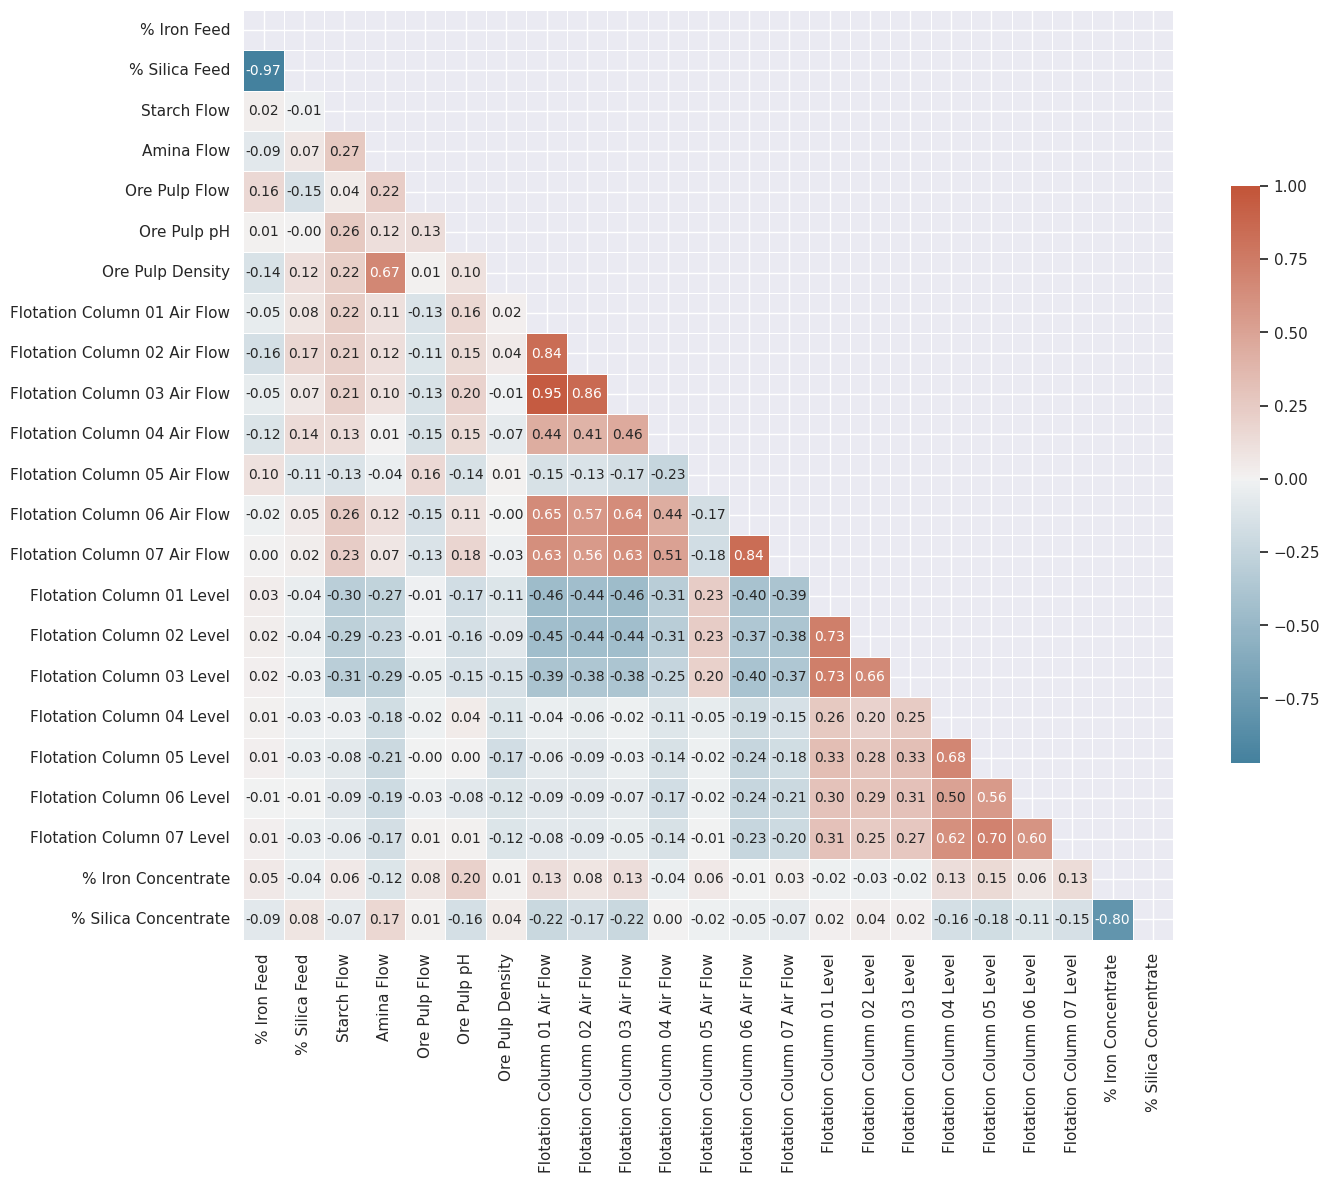

In [40]:
# Correlation Heatmap
f, ax = plt.subplots(figsize=(15, 15))
mat = flotation.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, 
            center=0, annot = True, square=True, 
            linewidths=.5, annot_kws={"fontsize": 10}, 
            cbar_kws={"shrink": .5}, fmt='.2f')
plt.show()

## **Averaging dataset to account for differently sampled features**

Based on the documentation of the dataset, some columns are sampled every 20 seconds, some every hour. For instance, the feature 'Ore Pulp Flow' changes continously during the process while the features '% Iron Feed' and '% Silica Feed' are sample only every hour. Thus, I think it is not really helpful to use every row (sampled every 20s) including the less sampled features (held constant over the duration of one hour), since this assumes that every row is an individual observation - which it isnt. Using all samples to train our model does not really represent the reality. What we can try to do is to mean the rows (observations) for every hour and create a new dataframe which uses the average of the 20s samples. This however, will strongly reduce our data size (by factor 180). What we can do to not lose all information of the 20s sampled features, is to also include their variations during one hour (e.g. by calculating also the standard deviation of the meaned columns).

In [21]:
flotation_mean = flotation.copy()
mean_grpby = flotation_mean.groupby(['date']).mean() # calculate mean
std_grpby = flotation_mean.groupby(['date']).std() # calculate std
std_grpby = std_grpby.loc[:, (std_grpby != 0).any(axis=0)] # delete null columns (columns with zero variance)
std_grpby = std_grpby.add_prefix('STD_') # add prefix to column names
flotation_merge = pd.merge(mean_grpby, std_grpby, on='date') # merge both dataframes
flotation_merge.describe().T

,count,mean,std,min,25%,50%,75%,max
% Iron Feed,4097.0,56.294730,5.158347,42.740000,52.670000,56.080000,59.720000,65.780000
% Silica Feed,4097.0,14.651733,6.808236,1.310000,8.940000,13.850000,19.600000,33.400000
Starch Flow,4097.0,2869.142009,950.480080,54.595483,2168.968993,2908.340847,3528.727412,6270.158798
Amina Flow,4097.0,488.145318,83.689937,242.927477,436.037967,502.454283,549.522256,736.982378
Ore Pulp Flow,4097.0,397.578386,8.370683,376.837604,398.851356,399.842656,400.589883,418.070232
Ore Pulp pH,4097.0,9.767642,0.378027,8.753389,9.540878,9.795850,10.030779,10.807370
Ore Pulp Density,4097.0,1.680380,0.063775,1.519926,1.651352,1.695705,1.721790,1.832430
Flotation Column 01 Air Flow,4097.0,280.151579,29.410048,175.885579,250.089767,299.837839,299.951350,312.295415
Flotation Column 02 Air Flow,4097.0,277.159709,29.423337,178.188430,250.096872,299.526717,299.979900,309.887767
Flotation Column 03 Air Flow,4097.0,281.082104,28.373511,177.202665,250.087672,299.888089,299.946594,302.783000


## **Modeling**
Now let's apply a model to check if we can predict the dependent variable '% Concentrate Silica'. First, we split our dataframe into train and validation set (train: first 80% of dataframe, test: last 20% of dataframe). Then we need to remove our '% Silica Concentrate' and '% Iron Concentrate' columns, since the first one is the dependent variable and the later is not available for the online implementation, as these values come from a lab measurement and takes roughly 1h 40 minutes.

**Training model with new dataframe 'df_merge':**

###**4.8. Save Grouped Datasets**

In [ ]:
flotation.to_csv('/content/drive/My Drive/Flotation/flotation_grouped.csv', index=False)